# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Creación de Datasets  y Dataloaders en Pytorch</center></span>

##   <span style="color:blue">Profesores</span>

- Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
- Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
- Campo Elías Pardo Turriago, cepardot@unal.edu.co 
- Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## **Contenido**

* [Introducción](#Introducción)
* [Descargar y usar dataset predeterminados](#descargar-y-usar-datasets-predeterminados)
* [Cargar datos usando un DataLoader](#Cargar-datos-usando-un-DataLoader)
* [Creación de conjuntos personalizados](#Creación-de-conjuntos-personalizados)

##   <span style="color:blue">Introducción</span>

inspirado inicialmente en los [tutoriales](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) de [pytorch](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

Desarrollar un "Pipeline" para el procesamiento de los datos para los modelos es una de las tareas más importantes para obtener un entrenamiento fructífero. El problema proviene de lo diferentes que pueden ser los proyectos y los datos a usar, haciendo cada uno de estos su "pequeño mundo".

Por suerte, pytorch ofrece una gran cantidad de bases de datos pre procesadas que se pueden descargar y usar de manera casi inmediata.  Y si esto no es suficiente, ofrecen la capacidad de crear clases personalizadas para procesar las bases de datos que se obtengan de manera externa.

##   <span style="color:blue">Descargar y usar datasets predeterminados.</span>

En los casos introductorios o de exploración básica, es una buena idea utilizar conjuntos de datos reconocidos, con la intención de no perder demasiado tiempo en la ardua tarea del preprocesamiento, además de poder tener puntos de comparación a la hora de comprobar la eficiencia de los modelos. Esto es particularmente verdadero en el campo de visión.

Pytorch, específicamente en el paquete "torchvision" permite descargar directamente varios de estos conjuntos de datos "Benchmarks", para luego usarlos rápida y efectivamente.

Para este primer acercamiento, descargaremos y haremos una primera visualización al conjunto de datos ["Fashion Mnist"](https://github.com/zalandoresearch/fashion-mnist). Este conjunto consta de *70000* imágenes de *10* diferentes tipos de prendas de vestir. Estas imagenes se encuentras en tonos de grises y tienen un tamaño de 28x28 pixeles. Este conjunto fue hecho con la intención explícita de ser usado como benchmark en los modelos de visión artificial.

In [40]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

en la mayoría de casos, los conjuntos de torchvision vienen separados en datos de entrenamiento y datos de prueba, y pueden descargarse y usarse de manera independiente

In [41]:
training_data = datasets.FashionMNIST(
    root="/mnt/storage/Datasets",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="/mnt/storage/Datasets", #cambiar para computadores personales.
    train=False,
    download=True,
    transform=ToTensor()
)

Con el conjunto ya descargado y definido como parte de nuestro código, podemos activamente usarlo, como por ejemplo visualizando algunos de los datos.

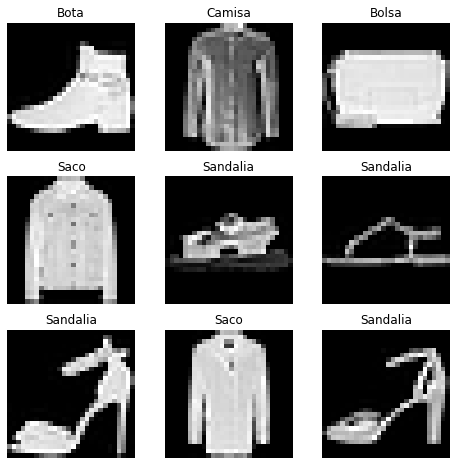

In [42]:
# hacemos un diccionario para reconocer cada etiqueta por su nombre verdadero
from matplotlib.pyplot import figure


labels_map = {
    0: "Camiseta",
    1: "Pantalón",
    2: "Suéter",
    3: "Vestido",
    4: "Saco",
    5: "Sandalia",
    6: "Camisa",
    7: "Zapato",
    8: "Bolsa",
    9: "Bota"
}

#Creamos una "matriz" donde se imprimirán las imagenes
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]  # type: ignore
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    

##   <span style="color:blue">Cargar datos usando un DataLoader</span>

Con el conjunto listo es hora de cargar los datos al modelo para que pueda entrenar usando estos. Esto lo logramos usando la función `torch.utils.data.DataLoader`. Esta función envuelve los datos en un iterador para  poder acceder de manera fácil y rápida a los datos.

In [43]:
from torch.utils.data import DataLoader

In [44]:
train_loader = DataLoader(
    dataset=training_data, #dataset de donde vamos a cargar los datos
    batch_size=64, #número de muestras usadas en una iteración
    shuffle=False, #se decide si se aleatoriza el orden de los datos en las muestras
    num_workers=0, #permite que se hagan múltiples procesos a la vez
    collate_fn=None, #se usa si se quiere concatenar los datos
    pin_memory=False #Decidir si se quieren cargar los datos en la GPU
)

test_loader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=True
)

Ahora podemos usar el dataloader para iterar sobre los datos. Cada iteración retorna un lote del tamaño específicado de duplas (`train_features`, `train_labels`). Debido a que definimos `shuffle=True` todos los lotes van a mezclarse.

forma del lote de características: torch.Size([64, 1, 28, 28])
forma del lote de las etiquetas: torch.Size([64])


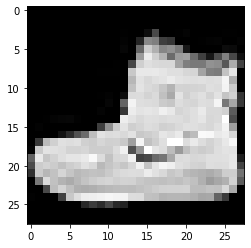

Etiqueta: 9


In [45]:
train_features, train_labels = next(iter(train_loader))
print(f'forma del lote de características: {train_features.size()}')
print(f'forma del lote de las etiquetas: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Etiqueta: {label}')

##   <span style="color:blue">Creación de conjuntos personalizados</span>

Por supuesto, vamos a querer traer nuestros propios datos y poder cargarlos apropiadamente, pero esto puede ser complicado dependiendo de la forma que estas estén organizadas. Para estos casos, podemos hacer nuestra propia clase para crear el conjunto de datos y luego cargarlos de igual manera.

In [46]:
import os
import pandas as pd
from torchvision.io import read_image

Vamos a utilizar el conjunto de datos "MNIST": Un conjunto de digitos escritos a mano.

In [47]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P /mnt/storage/Datasets
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P /mnt/storage/Datasets
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P /mnt/storage/Datasets
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P /mnt/storage/Datasets

--2022-08-19 16:41:36--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘/mnt/storage/Datasets/train-images-idx3-ubyte.gz.3’

train-images-idx3-u 100%[===================>]   9.45M  8.45MB/s    in 1.1s    

2022-08-19 16:41:37 (8.45 MB/s) - ‘/mnt/storage/Datasets/train-images-idx3-ubyte.gz.3’ saved [9912422/9912422]

--2022-08-19 16:41:38--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘/mnt/storage/Data

Revisamos los datos y los adaptamos depende a su contexto

(60000, 28, 28, 1)


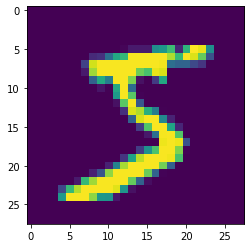

In [48]:
## imagenes de entrenamiento

import gzip

f = gzip.open('/mnt/storage/Datasets/train-images-idx3-ubyte.gz')

image_size = 28

num_images = 60000

import numpy as np

f.read(16)
buf = f.read(image_size*image_size*num_images)
data_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

data_train = data_train.reshape(num_images, image_size, image_size, 1)
print(data_train.shape)

image = np.asarray(data_train[0]).squeeze()
plt.imshow(image)
plt.show()

In [49]:
## etiquetas de entrenamiento

f = gzip.open('/mnt/storage/Datasets/train-labels-idx1-ubyte.gz')

num_labels = 60000


f.read(8)
buf = f.read(num_labels)
label_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

print(label_train.shape)
print(label_train[:20])

(60000,)
[5. 0. 4. 1. 9. 2. 1. 3. 1. 4. 3. 5. 3. 6. 1. 7. 2. 8. 6. 9.]


(10000, 28, 28, 1)


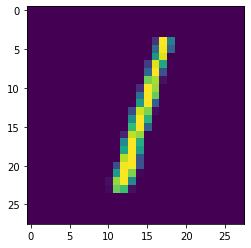

In [50]:
## imagenes de prueba

f = gzip.open('/mnt/storage/Datasets/t10k-images-idx3-ubyte.gz')

image_size = 28

num_images = 10000

import numpy as np

f.read(16)
buf = f.read(image_size*image_size*num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

data_test = data_test.reshape(num_images, image_size, image_size, 1)
print(data_test.shape)

image = np.asarray(data_test[2]).squeeze()
plt.imshow(image)
plt.show()

In [51]:
## etiquetas de prueba

f = gzip.open('/mnt/storage/Datasets/t10k-labels-idx1-ubyte.gz')

num_labels = 10000


f.read(8)
buf = f.read(num_labels)
label_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

print(label_test.shape)
print(label_test[:20])

(10000,)
[7. 2. 1. 0. 4. 1. 4. 9. 5. 9. 0. 6. 9. 0. 1. 5. 9. 7. 3. 4.]


con los datos organizados, podemos crear la nueva clase del dataset. 

una clase personalizada debe implementar tres funciones:
- `__init__`: inicializamos los directorios, variables, transformaciones y demás
- `__len__`: obtenemos el número de muestras en el conjunto
- `__getitem__`: Carga y obtiene una muestra del conjunto dato el índice `idx`. Con base en el este índice, se identifica la imágen y la etiqueta en la lista creada. Si tenemos alguna transformación, se aplicará.

In [52]:
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, labels, images, transform=None, target_transform=None):
        self.labels = labels
        self.images = images
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label =  self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [53]:
train_dataset = ImageDataset(label_train, data_train, transform=ToTensor())
test_dataset = ImageDataset(label_test, data_test, transform=ToTensor())

In [58]:
device = "cuda" if torch.cuda.is_available() else "cpu"
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                              **kwargs)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True,
                              **kwargs)

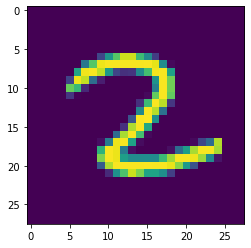

2.0


In [63]:
train_features, train_labels = next(iter(train_dataloader))
image = np.asarray(train_features[0]).squeeze()
label = np.asarray(train_labels[0]).squeeze()
plt.imshow(image)
plt.show()
print(label)